In [90]:
from modeler.model import Simulation, Surface, Agent, collect
import numpy as np
from skimage import data
from skimage.filters.rank import median
from skimage.morphology import disk
from matplotlib import pyplot as plt

%matplotlib inline

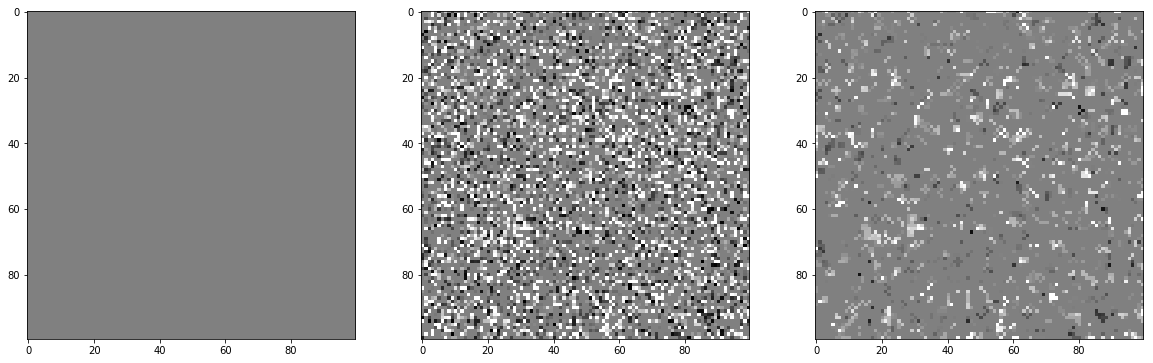

In [100]:
fig, axes = plt.subplots(1,3,figsize=(20,20))

surface = np.zeros((100,100)).astype('uint8') + 50
axes[0].imshow(surface, cmap='gray',vmin=0,vmax=100)

mask = np.random.randint(0,2,size=surface.shape).astype(np.bool)
rand = np.random.normal(50,40,size=surface.shape)
surface[mask] = rand[mask]
axes[1].imshow(surface, cmap='gray',vmin=0,vmax=100)

med = median(surface, disk(1))
axes[2].imshow(med, cmap='gray',vmin=0,vmax=100)

generated surface
Wall time: 1min 56s


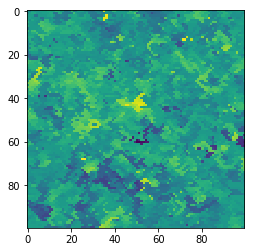

In [7]:
%%time
# must be a list of Surface objects
surfaces = [Surface(np.ones((100, 100), dtype='int8'))]

# a list of Agent objects
agents = [Agent() for x in range(500)]

# times steps
timesteps = pd.Series(np.arange(100))

s = Simulation(surfaces, agents, timesteps)
s.run()

s.data.apply(collect, image=s.surfaces[0].data, axis=1)
s.surfaces[0].plot()
print('generated surface')

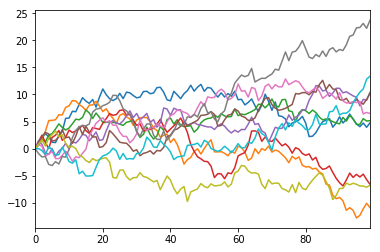

In [8]:
ax = s.agents[0].data.value.plot()
for agent in s.agents[1:10]:
    agent.data.value.plot(ax=ax)

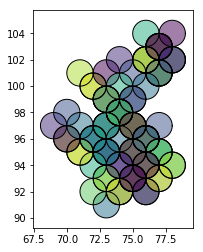

In [10]:
s.agents[0].data.plot()